# 선형적으로 분리되는 데이터셋에 서포트 벡터 머신 훈련시키기

## Iris Setosa와 Iris Versicolor 클래스는 선형적으로 구분이 가능하므로 Iris 데이터셋을 사용

* 데이터 준비

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

* 각각 LinearSVC, SVC, SGDClassifier 모델 만들기

In [18]:
C = 5
alpha = 1 / (C * len(X))

#LinearSVC
lin_clf = LinearSVC(C=C, loss="hinge")
#SVC
svm_clf = SVC(kernel="linear",C=C)
#SGDClassifier
sgd_clf = SGDClassifier(loss="hinge",alpha=alpha) 

* 표준화 하기

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* 모델 훈련

In [20]:
#### LinearSVC
lin_clf.fit(X_scaled,y)
#### SVC
svm_clf.fit(X_scaled,y)
#### SGDClassifier
sgd_clf.fit(X_scaled,y)

SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

* 각 모델의 모델 파라미터 (intercept_, coef_, ) 확인하기

In [21]:
print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474184] [[1.05364673 1.09903209]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.36313397] [[1.507765   1.65738554]]


* 모델의 결정 경계 그리기

In [22]:
import matplotlib.pyplot as plt

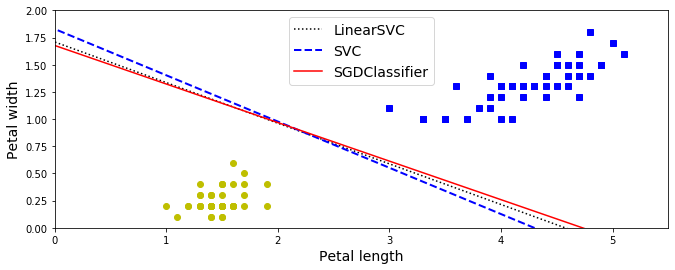

In [23]:
# 각 결정 경계의 기울기와 편향을 계산합니다
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환합니다
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# 세 개의 결정 경계를 모두 그립니다
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# MNIST 데이터셋에 SVM 분류기를 훈련

* 데이터 준비

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

* 모델 훈련 (몇분 소요)

In [25]:
lin_clf = LinearSVC(C=1.0, random_state=42)
lin_clf.fit(X_train, y_train)

C:\Users\edu\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

* 정확도 예측 (훈련세트로)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = lin_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8832

* 특성 스케일링 (표준화)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   # test set은 fit하지않고 transform만 한다

* 모델 훈련 (몇 분 소요)

In [28]:
lin_clf.fit(X_train_scaled,y_train)

C:\Users\edu\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [29]:
y_pred_scaled = lin_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred_scaled)

0.9122

* RBF 커널(기본값)로 SVM 적용 (MNIST에서 좋은 성능은 아니므로)

In [30]:
svm_clf = SVC(C=1.0)
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
y_pred_svm = svm_clf.predict(X_test_scaled) 
accuracy_score(y_test, y_pred_svm)

0.9386

* SVM을 사용했을 때 6배나 적은 데이터에서 모델을 훈련시켜 좋은 성능을 얻음

* 추가적으로 해볼것 : 교차 검증을 사용한 랜덤 서치로 하이퍼파라미터 튜닝

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=7.9649452205463, gamma=0.014075574841901242 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... C=7.9649452205463, gamma=0.014075574841901242, total=   0.9s
[CV] C=7.9649452205463, gamma=0.014075574841901242 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .... C=7.9649452205463, gamma=0.014075574841901242, total=   0.9s
[CV] C=7.9649452205463, gamma=0.014075574841901242 ...................
[CV] .... C=7.9649452205463, gamma=0.014075574841901242, total=   0.9s
[CV] C=5.34300631445526, gamma=0.022419426790704935 ..................
[CV] ... C=5.34300631445526, gamma=0.022419426790704935, total=   0.9s
[CV] C=5.34300631445526, gamma=0.022419426790704935 ..................
[CV] ... C=5.34300631445526, gamma=0.022419426790704935, total=   0.9s
[CV] C=5.34300631445526, gamma=0.022419426790704935 ..................
[CV] ... C=5.34300631445526, gamma=0.022419426790704935, total=   0.9s
[CV] C=3.613729487508243, gamma=0.0034188031434915127 ................
[CV] . C=3.613729487508243, gamma=0.0034188031434915127, total=   0.8s
[CV] C=3.613729487508243, gamma=0.0034188031434915127 ................
[CV] . C=3.613729487508243, gamma=0.0034188031434915127, total=   0.8s
[CV] C=3.613729487508243, gamma=0.0034188031434915127 ................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   23.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018F36980C48>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018F375E5248>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [33]:
rnd_search_cv.best_estimator_

SVC(C=2.729896784432535, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001082325613417483, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [34]:
rnd_search_cv.best_score_

0.8589937242631853

* 최적의 모델로 전체 훈련 세트에 대해 다시 훈련

In [35]:
rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

SVC(C=2.729896784432535, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.001082325613417483, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [36]:
y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9919

* 테스트 세트로 최종 평가

In [37]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9703